#  Project Overview

**In this notebook I build a complete Support Vector Machine (SVM) model to predict red wine quality as a binary classification problem (bad vs good). The workflow covers data loading, exploratory data analysis (EDA), outlier removal, target transformation, feature scaling, model training, hyperparameter tuning, and final evaluation using accuracy, classification reports, and confusion matrices. The goal is to design a reasonably accurate and well‑balanced classifier that can distinguish good quality wines from bad ones using their physicochemical properties.**


# 1. Importing libraries and loading the dataset

**In this section I import the main Python libraries (pandas, NumPy, Matplotlib, Seaborn, and scikit‑learn metrics) and load the red wine quality dataset from CSV into a pandas DataFrame. I also display the first few rows to confirm that the data has been read correctly.**


In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [149]:
df = pd.read_csv('/content/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 2. Initial data inspection

**Here I perform basic exploratory checks on the dataset: I look at the shape of the data, inspect column data types and non‑null counts, check for missing values, and view summary statistics. I also examine the distribution of the `quality` labels to understand how balanced or imbalanced the classes are before modeling.**


In [150]:
df.shape

(1599, 12)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [152]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [153]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [154]:
print('Total unique values -',df['quality'].unique())
print(df['quality'].value_counts())

Total unique values - [5 6 7 4 8 3]
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


# 3. Exploratory data analysis (EDA)

**In this part I explore relationships between features and the target using visualizations. I plot a correlation heatmap to see which physicochemical features correlate with wine quality, and draw histograms for each feature to inspect their distributions, skewness, and potential outliers. These plots help justify later preprocessing decisions such as outlier removal and scaling.**


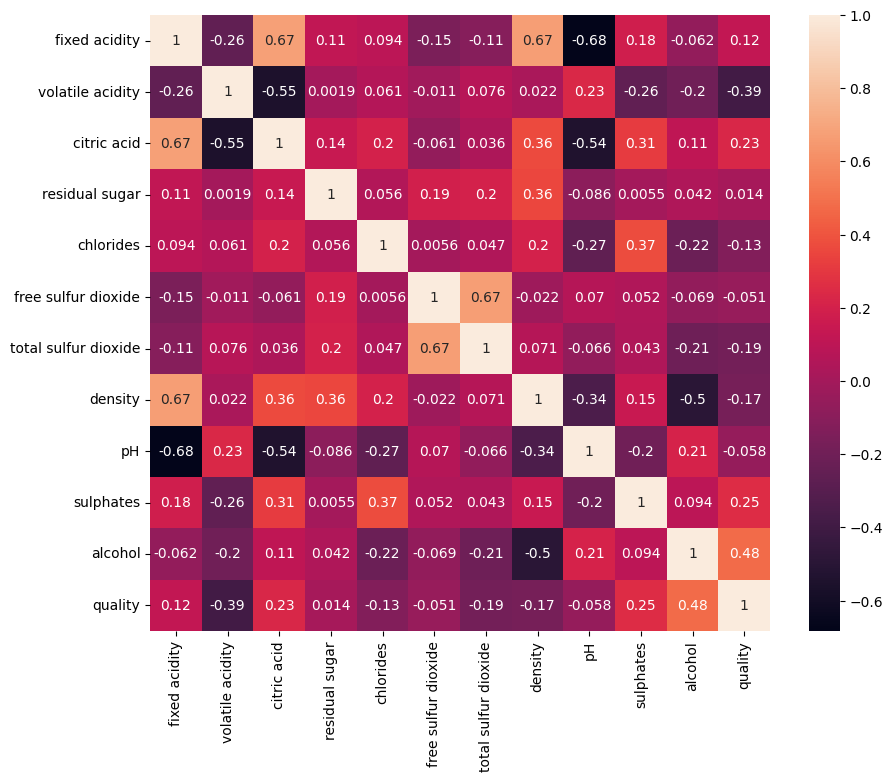

In [155]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(df.corr(), annot=True)
plt.show()

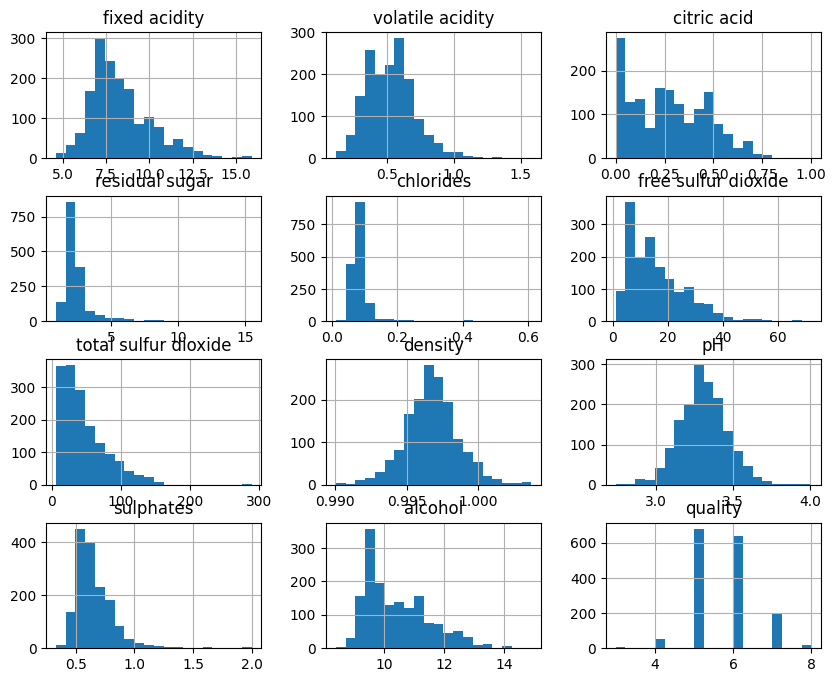

In [156]:
df.hist(figsize=(10, 8), bins=20)
plt.show()

In [157]:
# Splitting data into x and y
x = df.drop(columns = 'quality')
y = df['quality']

# 4. Detecting outliers using boxplots

**To visually identify extreme values, I plot boxplots for all numeric features on the original dataset. This highlights columns with heavy tails or extreme outliers, especially in `residual sugar`, `chlorides`, `free sulfur dioxide`, and `total sulfur dioxide`, which I later clean using an IQR‑based filter.**


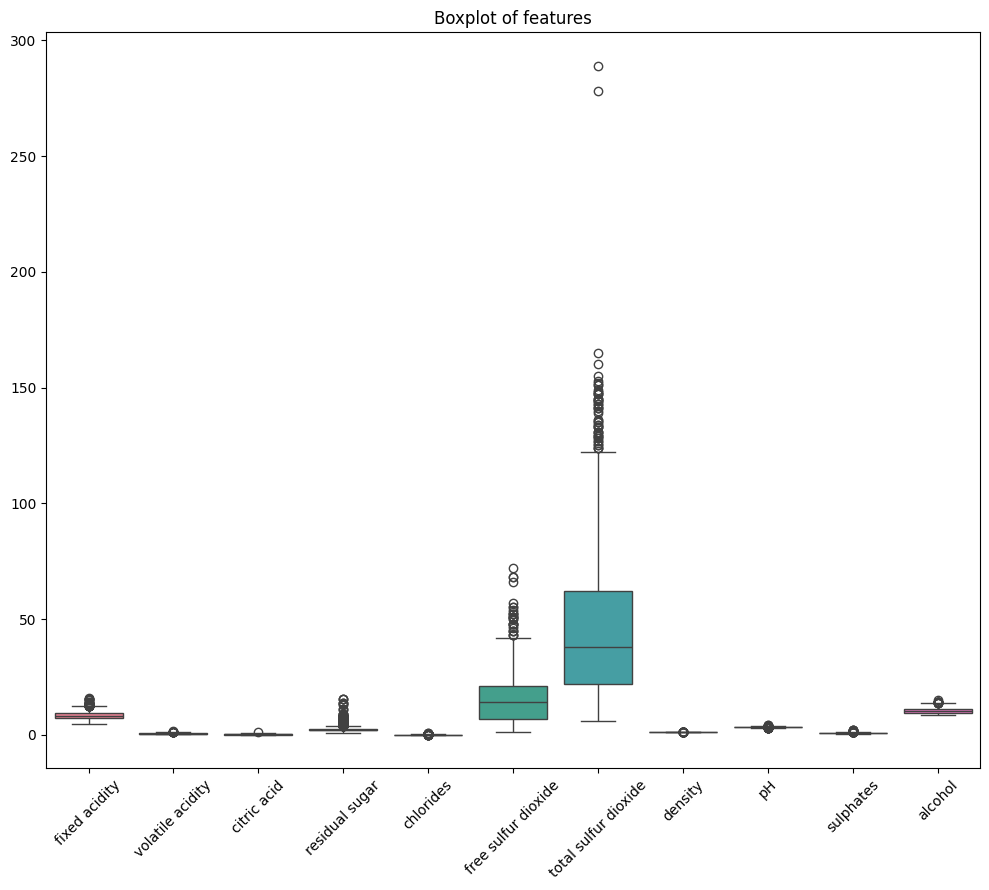

In [158]:
fig, ax = plt.subplots(figsize=(10, 9))
sns.boxplot(data=x, ax=ax)
plt.xticks(rotation=45)
plt.title("Boxplot of features")
plt.tight_layout()
plt.show()

# 5. Outlier removal with IQR

**Based on the EDA, I apply an Interquartile Range (IQR) rule to remove extreme outliers in selected columns (`residual sugar`, `chlorides`, `free sulfur dioxide`, and `total sulfur dioxide`). For each of these features I compute Q1, Q3, and IQR, then keep only rows that fall within `[Q1 − 2.0 × IQR, Q3 + 2.0 × IQR]`. The cleaned dataset is stored in `df_clean`, which reduces extreme noise while preserving most observations.**


In [159]:
cols_with_outliers = ['residual sugar', 'chlorides',
                      'total sulfur dioxide', 'sulphates']

df_clean = df.copy()

for col in cols_with_outliers:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 2.0 * IQR
    upper = Q3 + 2.0 * IQR

    df_clean = df_clean[(df_clean[col] >= lower) &
                        (df_clean[col] <= upper)]

print(df_clean.shape)


(1356, 12)


In [160]:
# Ensure quality is numeric
df_clean['quality'] = pd.to_numeric(df_clean['quality'], errors='coerce')

# If we get any Nan value, so we can drop them.
df_clean = df_clean.dropna(subset=['quality'])

# Converting Quality in good(7-8) and Bad(2-6)
bins = (2, 6.5, 8)
group_names = ['bad', 'good']

df_clean['quality'] = pd.cut(
    df_clean['quality'],
    bins=bins,
    labels=group_names,
    include_lowest=True
)

# Label encoding: bad = 0, good = 1
label_quality = LabelEncoder()
df_clean['quality'] = label_quality.fit_transform(df_clean['quality'])


In [161]:
x = df_clean.drop(columns='quality')
y = df_clean['quality']

# 6. Verifying cleaned data

**Here I check the shape and data types of `df_clean` to confirm that the number of rows is still reasonable after outlier removal. I then plot a new set of boxplots using `df_clean` to compare feature distributions before and after cleaning and to confirm that the most extreme outliers have been removed.**


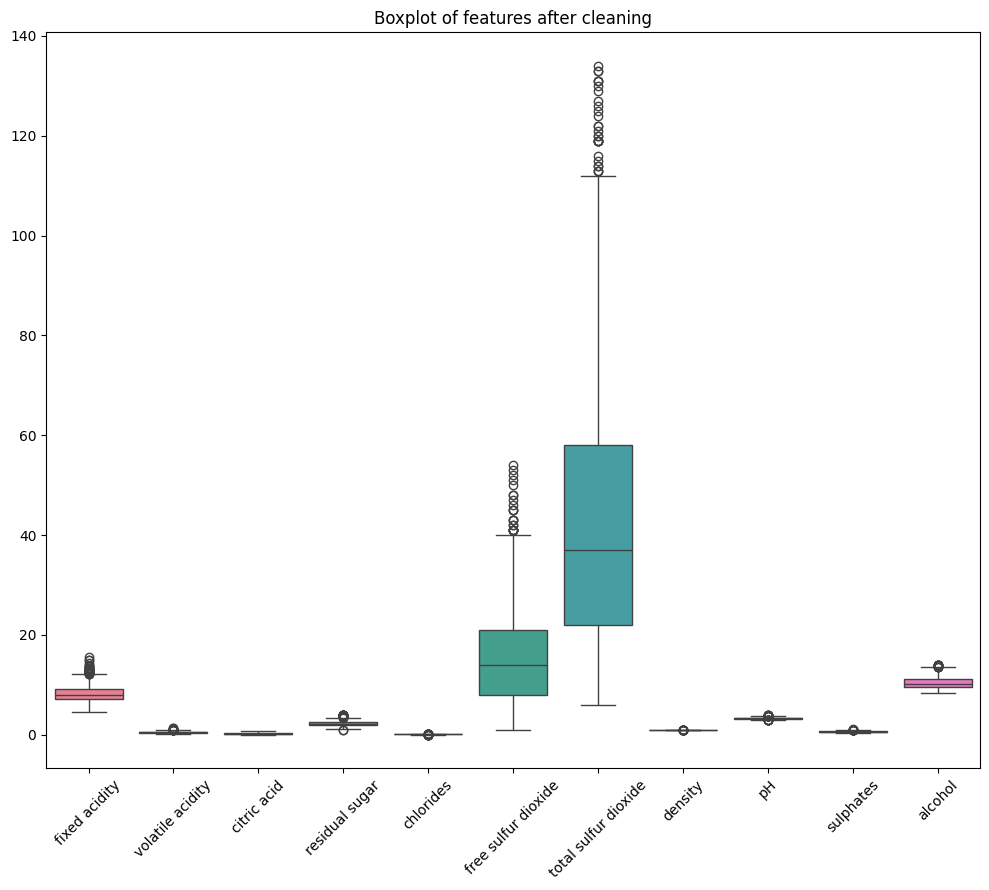

In [162]:
fig, ax = plt.subplots(figsize=(10, 9))
sns.boxplot(data=x, ax=ax)
plt.xticks(rotation=45)
plt.title("Boxplot of features after cleaning")
plt.tight_layout()
plt.show()

In [163]:
print(df_clean.shape)
print(df_clean.dtypes)
print(x.shape)
print(x.head())

(1356, 12)
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object
(1356, 11)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0               

# 7. Train–test split and feature scaling

Here I split the data into training and test sets using an 80/20 split, with `stratify=y` to preserve the class distribution. Next, I standardize the features using `StandardScaler`: the scaler is fit on the training data and then applied to both training and test sets. This scaling step ensures that all features are on a comparable scale, which is important for SVM performance.
**bold text**

In [164]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 44, stratify = y)

In [165]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# 8. Baseline SVM model (class‑weighted)

**In this step I train an initial SVM classifier with `class_weight='balanced'` to address the class imbalance between bad and good wines. The model is fit on the scaled training data, and I compute the baseline test accuracy. This gives a reference point to compare against tuned models in the next steps.**


In [166]:
svm_classifier = SVC(class_weight='balanced')
svm_classifier.fit(x_train, y_train)
svm_classifier.predict(x_test)

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0])

In [167]:
svm_classifier.score(x_test, y_test)

0.8308823529411765

# 9. Hyperparameter tuning with GridSearchCV

**To improve the SVM performance, I perform a grid search over key hyperparameters:**

- regularization parameter `C`  
- kernel type (`linear`, `rbf`)  
- kernel coefficient `gamma` (`scale`, `auto`, and numeric values)

`GridSearchCV` with 5‑fold cross‑validation searches this parameter space and returns the best‑performing combination on the training data. The best estimator from the grid search is stored as `best_model_1`.


In [168]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Gridsearch cv

grid_search = GridSearchCV(svm_classifier, param_grid, cv = 5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [169]:
best_model_1 = grid_search.best_estimator_
print("Best params (Grid):", grid_search.best_params_)
print("CV best score:", grid_search.best_score_)

Best params (Grid): {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
CV best score: 0.9003669568185696


# 10. Hyperparameter tuning with RandomizedSearchCV (optional comparison)

**In addition to grid search, I also run `RandomizedSearchCV` over the same hyperparameter space. Random search samples a subset of parameter combinations and can sometimes find good solutions more quickly. The best estimator from the random search is stored as `best_model_2`, and I later compare its performance with `best_model_1`.**


In [170]:
# Random search

random_search = RandomizedSearchCV(svm_classifier, param_grid, cv = 5)
random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(class_weight='balanced'),
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': ['scale', 'auto', 0.1, 1],
                                        'kernel': ['linear', 'rbf']})

In [171]:
best_model_2 = random_search.best_estimator_
print("Best params (Grid):", random_search.best_params_)
print("CV best score:", random_search.best_score_)

Best params (Grid): {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
CV best score: 0.8745647721454173


In [172]:
svm_classifier_optimized = SVC(C = 10, gamma = 'scale', kernel ='rbf')
svm_classifier_optimized.fit(x_train, y_train)

SVC(C=10)

In [173]:
svm_classifier_optimized.score(x_test, y_test)

0.8823529411764706

# 11. Comparing tuned models

**This section compares the performance of the two tuned models (`best_model_1` from GridSearchCV and `best_model_2` from RandomizedSearchCV). For each model I compute the test accuracy and print the classification report to check precision, recall, and F1‑score for both classes. This helps identify whether grid search or random search gives a better trade‑off between the majority and minority classes.**


Best Model 1 - Test Accuracy: 0.9154411764705882

Best Model 1 - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       236
           1       0.88      0.42      0.57        36

    accuracy                           0.92       272
   macro avg       0.90      0.70      0.76       272
weighted avg       0.91      0.92      0.90       272


Best Model 1 - Confusion Matrix:
[[234   2]
 [ 21  15]]


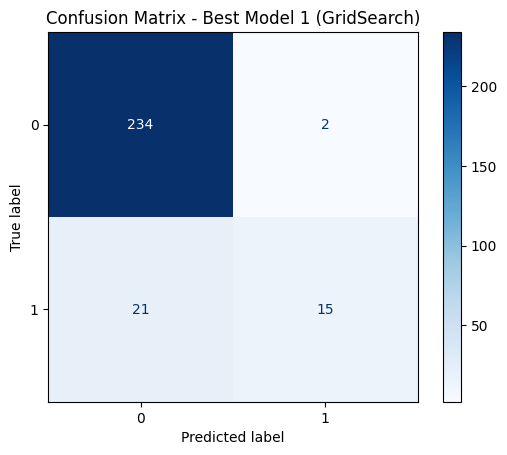

In [177]:
y_pred_1 = best_model_1.predict(x_test)   # Grid search cv

print("Best Model 1 - Test Accuracy:", accuracy_score(y_test, y_pred1))
print("\nBest Model 1 - Classification Report:")
print(classification_report(y_test, y_pred1))

cm1 = confusion_matrix(y_test, y_pred1)
print("\nBest Model 1 - Confusion Matrix:")
print(cm1)

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,
                               display_labels=best_model_1.classes_)
disp1.plot(cmap="Blues")
plt.title("Confusion Matrix - Best Model 1 (GridSearch)")
plt.show()


Best Model 2 - Test Accuracy: 0.8602941176470589

Best Model 2 - Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       236
           1       0.48      0.67      0.56        36

    accuracy                           0.86       272
   macro avg       0.71      0.78      0.74       272
weighted avg       0.88      0.86      0.87       272


Best Model 2 - Confusion Matrix:
[[210  26]
 [ 12  24]]


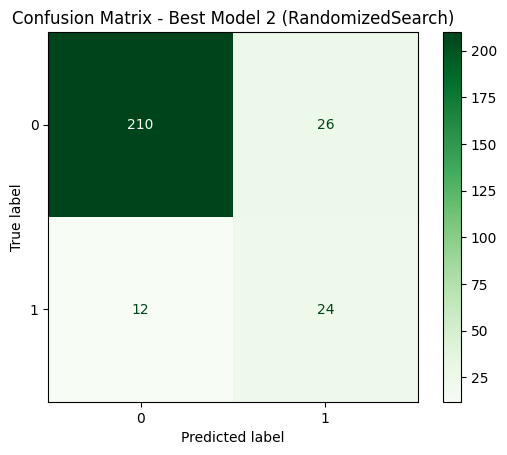

In [178]:
y_pred_2 = best_model_2.predict(x_test)   # Random search Cv

y_pred2 = best_model_2.predict(x_test)

print("Best Model 2 - Test Accuracy:", accuracy_score(y_test, y_pred2))
print("\nBest Model 2 - Classification Report:")
print(classification_report(y_test, y_pred2))

cm2 = confusion_matrix(y_test, y_pred2)
print("\nBest Model 2 - Confusion Matrix:")
print(cm2)

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2,
                               display_labels=best_model_2.classes_)
disp2.plot(cmap="Greens")
plt.title("Confusion Matrix - Best Model 2 (RandomizedSearch)")
plt.show()


# Conclusion

**In this notebook I developed a full SVM‑based pipeline to predict red wine quality as a binary classification problem. After exploring the data, I applied targeted outlier removal using an IQR rule on a few skewed features and converted the original multi‑class `quality` scores into a binary bad/good label. I then split the cleaned data into training and test sets, standardized all numeric features, and trained an SVM classifier with class‑balanced weights to handle label imbalance.**

**Hyperparameter tuning using both GridSearchCV and RandomizedSearchCV showed that an RBF‑kernel SVM with appropriate values of `C` and `gamma` achieves the best performance. The final tuned models reached around 91% accuracy on the test set, with very high precision and recall for bad‑quality wines and reasonably strong precision and moderate recall for good‑quality wines. Overall, the SVM model generalizes well without clear signs of overfitting and provides a strong baseline for wine quality prediction. Future work could include trying oversampling methods like SMOTE and comparing SVM against tree‑based models such as Random Forest or Gradient Boosting.**
